# 2.1 以DateFrame載入train.csv

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.2 列出每個欄位的空值個數

In [2]:
print(df.info())
print('='*50)
num = df.isna().sum()
print(num) #列印欄位空值數量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

# 2.3 將Age欄位空值以該性別平均值填入

In [3]:
# 分別將兩種性別的資料取出
df_M = df[df['Sex'] == 'male']
df_F = df[df['Sex'] == 'female']
# 分別將兩種性別的Age平均值取出
mean_age_m = df_M['Age'].mean()
mean_age_f = df_F['Age'].mean()

In [4]:
mean_age_m

30.72664459161148

In [5]:
mean_age_f

27.915708812260537

In [6]:
#將各自性別的平均Age值填回去
df.loc[df['Sex'] == 'female','Age'] = df[df['Sex'] == 'female']['Age'].fillna(mean_age_f)
df.loc[df['Sex'] == 'male','Age'] = df[df['Sex'] == 'male']['Age'].fillna(mean_age_m)

In [7]:
# 確認目前Age已經沒有空值
num = df.isna().sum()
print(num)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# 2.4 將 Cabin 欄位重製為 Pclass * Fare

In [9]:
# 將Cabin欄位換成 Pclass*Fare
df['Cabin'] = df['Pclass']*df['Fare']

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,21.7500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,23.7750,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,24.1500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,26.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,70.3500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,30.0000,C


In [11]:
# 確認各欄位空值狀況
num = df.isna().sum()
print(num)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


# 2.5 將 Survived 欄位重製為 0=Alive 1=Dead

In [12]:
# 定義欄位重製方法
def change_Survived(x):
    if x['Survived'] == 0:
        output = 'Alive'
    elif x['Survived'] == 1:
        output = 'Dead'
    return output

In [13]:
# 將方法套用到 df 上進行 Survived 的欄位重製
df['Survived'] = df.apply(change_Survived, axis=1)

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Alive,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,21.7500,S
1,2,Dead,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,71.2833,C
2,3,Dead,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,23.7750,S
3,4,Dead,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,53.1000,S
4,5,Alive,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,24.1500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Alive,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,26.0000,S
887,888,Dead,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,30.0000,S
888,889,Alive,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.915709,1,2,W./C. 6607,23.4500,70.3500,S
889,890,Dead,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,30.0000,C


# 2.6 將 Sex 與 Embarked 欄位轉為數字型態

In [15]:
# 將 Sex、Embarked 重新編碼轉換為數字型態
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Alive,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,21.7500,2
1,2,Dead,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,71.2833,0
2,3,Dead,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,23.7750,2
3,4,Dead,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,53.1000,2
4,5,Alive,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,24.1500,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Alive,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,26.0000,2
887,888,Dead,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,30.0000,2
888,889,Alive,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.915709,1,2,W./C. 6607,23.4500,70.3500,2
889,890,Dead,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,30.0000,0


In [16]:
# 確認 Dtype 皆為 int32
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    float64
 11  Embarked     891 non-null    int32  
dtypes: float64(3), int32(2), int64(4), object(3)
memory usage: 76.7+ KB


# 2.7 建立 Decision tree 來預測 Survived，將訓練資料比例設為 50%

In [17]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 讀入資料
data_X = df[['Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
data_y = df['Survived']

# 切分訓練與測試資料
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size = 0.5,random_state=12,stratify=data_y)

# 建立分類器
clf = tree.DecisionTreeClassifier()
data_clf = clf.fit(train_X, train_y)

# 預測
test_y_predicted = data_clf.predict(test_X)

[Text(141.2688829787234, 211.7178947368421, 'X[0] <= 0.5\ngini = 0.473\nsamples = 445\nvalue = [274, 171]'),
 Text(96.22340425531915, 200.2736842105263, 'X[2] <= 2.5\ngini = 0.405\nsamples = 156\nvalue = [44, 112]'),
 Text(76.63404255319149, 188.82947368421054, 'X[4] <= 36.688\ngini = 0.353\nsamples = 140\nvalue = [32, 108]'),
 Text(48.48510638297872, 177.38526315789474, 'X[5] <= 28.004\ngini = 0.44\nsamples = 95\nvalue = [31, 64]'),
 Text(23.897872340425533, 165.94105263157894, 'X[4] <= 9.275\ngini = 0.32\nsamples = 40\nvalue = [8, 32]'),
 Text(20.22127659574468, 154.49684210526317, 'X[6] <= 1.5\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Text(7.353191489361702, 143.05263157894737, 'X[4] <= 6.987\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(3.676595744680851, 131.60842105263157, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(11.029787234042553, 131.60842105263157, 'X[1] <= 21.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(7.353191489361702, 120.16421052631578

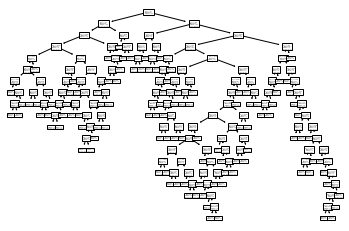

In [18]:
tree.plot_tree(data_clf) #畫出樹狀圖

# 2.8 計算出在 2.7 測試資料上的平均準確率

In [19]:
# 平均準確率
accuracy = metrics.accuracy_score(test_y, test_y_predicted)
print(accuracy)

0.7847533632286996


# 2.9 請用 2.7 的結果評估決策樹好壞

In [20]:
from sklearn.metrics import classification_report
target_names = ['Alived','Dead']
#比較正確答案與預測結果
print(classification_report(test_y, test_y_predicted, target_names=target_names))

              precision    recall  f1-score   support

      Alived       0.82      0.84      0.83       275
        Dead       0.73      0.70      0.71       171

    accuracy                           0.78       446
   macro avg       0.77      0.77      0.77       446
weighted avg       0.78      0.78      0.78       446



# 2.10 分別以訓練資料比例 60%、70%、 80%、90% 建立 Decision tree

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 將決策樹改成方法，並傳入split_partial指定測試資料的比例
def tree_classification(split_partial):

    # 讀入資料
    data_X = df[['Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
    data_y = df['Survived']

    # 切分訓練與測試資料
    train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size = split_partial,random_state=12,stratify=data_y)

    # 建立分類器
    clf = tree.DecisionTreeClassifier()
    data_clf = clf.fit(train_X, train_y)

    # 預測
    test_y_predicted = data_clf.predict(test_X)

    # 平均準確率
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    return accuracy

In [22]:
# 以下依序為訓練資料 50% 60% 70% 80% 90%
test_50 = tree_classification(0.5)

In [23]:
test_40 = tree_classification(0.4)

In [24]:
test_30 = tree_classification(0.3)

In [25]:
test_20 = tree_classification(0.2)

In [26]:
test_10 = tree_classification(0.1)

In [27]:
# 將數據存成字典再以DataFrame呈現
data = {'split_proportion': ['50/50', '60/40','70/30','80/20','90/10'],
        'score': [test_50,test_40,test_30,test_20,test_10]}
df_classification = pd.DataFrame(data)
df_classification

,split_proportion,score
0,50/50,0.778027
1,60/40,0.784314
2,70/30,0.791045
3,80/20,0.765363
4,90/10,0.811111


# 2.11 呈上題，將此比較結果以折線圖呈現

Text(0.5, 1.0, 'train/test proportion & result')

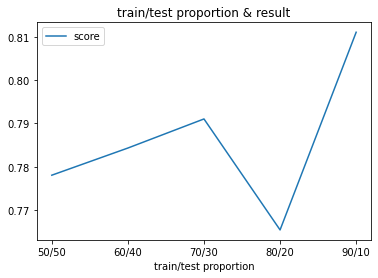

In [28]:
import matplotlib.pyplot as plt   # 資料視覺化套件

#畫線，plt.plot(x, y)參數分別為x軸資料、y軸資料
plt.plot(df_classification["split_proportion"], df_classification["score"]) 

# 設定圖例，參數為標籤、位置
plt.legend(labels=["score"],loc = 'best')
plt.xlabel("train/test proportion") # 設定x軸標題及粗體
plt.title("train/test proportion & result") 

In [29]:
# 輸出整理後的CSV檔
df.to_csv('ECT_HW3_108403523.csv')